Name: Verlynn Chong
    
I am working on Barclays's Problem Statement; Airfoil Self Noise Dataset

In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

In [2]:
filelink = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ["Frequency", "Angle", "Length", "Velocity", "Thickness", "Pressure"]


In [3]:
dataset = pd.read_csv(filelink, sep='\t', header=None, names=columns)
dataset.head(2)

,Frequency,Angle,Length,Velocity,Thickness,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [4]:
#identify null
dataset.isnull().sum()

Frequency    0
Angle        0
Length       0
Velocity     0
Thickness    0
Pressure     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  1503 non-null   int64  
 1   Angle      1503 non-null   float64
 2   Length     1503 non-null   float64
 3   Velocity   1503 non-null   float64
 4   Thickness  1503 non-null   float64
 5   Pressure   1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


Before model training, I preview the data, select columns that influence the prediction and discard other columns from the final dataset. 
As dataset has numeric fields on different scales, data normalisation have to be done to bring them to the common scale.

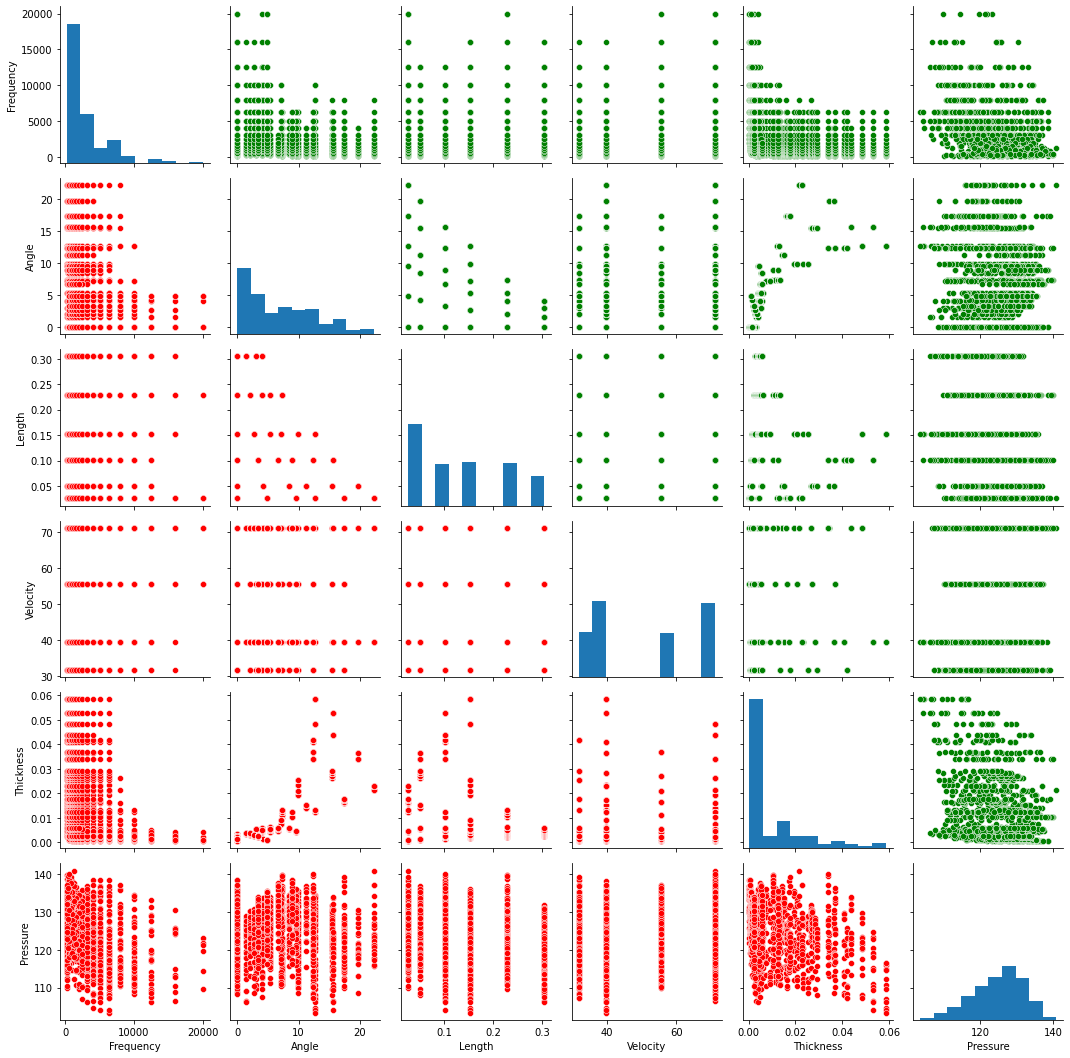

In [6]:
datasetgraph=dataset.copy()
graph=sns.PairGrid(datasetgraph)
graph.map_upper(sns.scatterplot,color='green')
graph.map_lower(sns.scatterplot,color='red')
graph.map_diag(plt.hist)

In [7]:
print(datasetgraph["Velocity"].value_counts())
# There are only 4 free velocity

39.6    480
71.3    465
31.7    281
55.5    277
Name: Velocity, dtype: int64


In [8]:
x1=dataset[["Frequency", "Angle", "Length", "Velocity", "Thickness", "Pressure"]]
x=StandardScaler().fit_transform(x1)
y=dataset['Pressure']

#Case 1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [9]:
#Case 1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)
y_predict=LinearReg.predict(x_test)
accuracy = r2_score(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict,squared=True)

print("Case 1:")
print("Accuracy = ",accuracy)
print("Mean Sqaure Error = ",MSE)

Case 1:
Accuracy =  1.0
Mean Sqaure Error =  3.8913643590437156e-29


In [10]:
#Case 2
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.9,random_state=10)

LinearReg = LinearRegression()
LinearReg.fit(x_train2,y_train2)
y_predict2=LinearReg.predict(x_test2)
accuracy = r2_score(y_test2,y_predict2)
MSE = mean_squared_error(y_test2,y_predict2,squared=True)

print("Case 2:")
print("Accuracy = ",accuracy)
print("Mean Sqaure Error = ",MSE)

Case 2:
Accuracy =  1.0
Mean Sqaure Error =  2.7045860001972004e-28


In [11]:
kf = KFold(n_splits=5, random_state=10, shuffle=True)  # 5-fold cross validation

accuracy_kfold = []    
mse_kfold = []   

lr = LinearRegression()
x_kfold = pd.DataFrame(x)
y_kfold = y

for i, j in kf.split(x_kfold):
    X_train, X_test = x_kfold.iloc[i], x_kfold.iloc[j]
    y_train, y_test = y_kfold.iloc[i], y_kfold.iloc[j]
    
    fit = lr.fit(X_train, y_train)
    y_predict_kf = lr.predict(X_test)
    
    acc_kfold = r2_score(y_test, y_predict_kf)
    mse_k = mean_squared_error(y_test, y_predict_kf, squared=True)
    accuracy_kfold.append(acc_kfold)
    mse_kfold.append(mse_k)

print("The Accuracy for each fold is:\n", accuracy_kfold, "\n")
print("The MSE for each fold is:\n", mse_kfold, "\n")
print("***************")
print(f"Overall Accuracy score: {np.mean(accuracy_kfold)}")
print(f"Overall MSSE score: {np.mean(mse_kfold)}")

The Accuracy for each fold is:
 [1.0, 1.0, 1.0, 1.0, 1.0] 

The MSE for each fold is:
 [1.878589690572828e-29, 2.844721531438854e-28, 8.051098673883549e-30, 2.692645223154387e-30, 3.325416850595668e-28] 

***************
Overall Accuracy score: 1.0
Overall MSSE score: 1.2930869580124368e-28
